## **NOMES E IDENTIFICAÇÃO**
### **César Henrique Rodrigues de Campos**
### **RA: 23021588**
### **Gustavo Dório Dos Santos**
### **RA: 23006995**

#### **Importando bibliotecas**

In [9]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import random as rd
from algorithm import Clicks

### **Criando o grafo aleatório e a lista de cores**

In [10]:
# picking the number of nodes for the graph
n = int(input("Digite a quantidade de vertices do grafo..."))
# catching the colors in RGBA indice
colors_amount = int(input("Coloque a quantidade de cores para coloração do grafo..."))
colors_define = plt.cm.turbo(np.linspace(0,1,colors_amount))

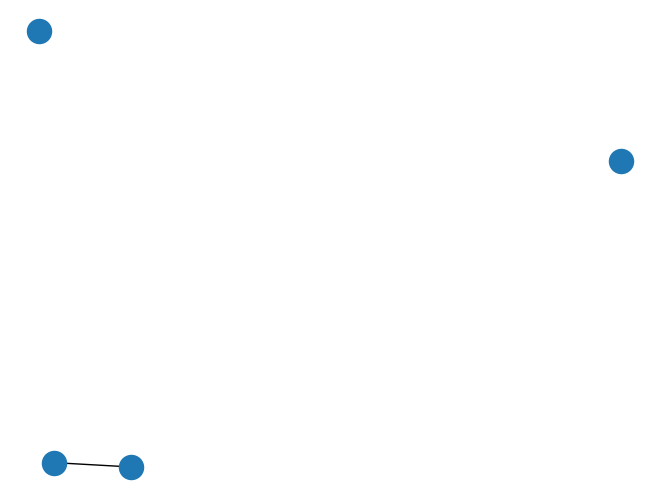

In [11]:
# Criando e plotando o grafo aleatório
graph = nx.gnp_random_graph(n, 0.3)
nx.draw(graph)
plt.show()

### **Colorindo o grafo**

In [20]:
# transforming rgba color in hexa color format
def hexa_color(list_rgba):
    hex = []
    for item in list_rgba:
        hex.append('#{0:02x}{1:02x}{2:02x}'.format(int(item[0]*255),int(item[1]*255),int(item[2]*255)).upper())
    return hex 

In [21]:
# verifying if the graph has contidion to be colored
def verifying_clicks_for_color(colors, module):
    for click in module.clicks:
        if len(click) > len(colors):
            return 1
    return 0
    

In [22]:
#function to color the graph
def coloring_graph(graph, adjacency, list_hex):
    #dicionario, no e cor em que ele vai ser colocado
    colors = {}
    #para cada no dentro do grafo
    for node in graph.nodes():
        #lista de cores disponiveis
        avaliable_color = list_hex.copy()
        #pegando a lista de adjacencia do no
        node_adjacency = adjacency[node]
        #para cara adjacente dentro da lista
        for adjacent in node_adjacency:
            #se adjacent esta em color
            if adjacent in colors:
                #lista de cores disponiveis remove a cor que esta colorindo o no adjacente
                avaliable_color.remove(colors[adjacent]) 
        #atribuindo uma cor aleatoria ao dicionario de nos
        colors[node] = avaliable_color[rd.randint(0, len(avaliable_color)-1)] #atribuindo a nova cor ao no destacado
    pos = nx.spring_layout(graph)
    nx.draw(graph, pos, with_labels=True, node_color=[colors[n] for n in graph.nodes()])
    plt.show()
    return colors

In [23]:
module = Clicks(graph)
list_color_hex = hexa_color(colors_define)

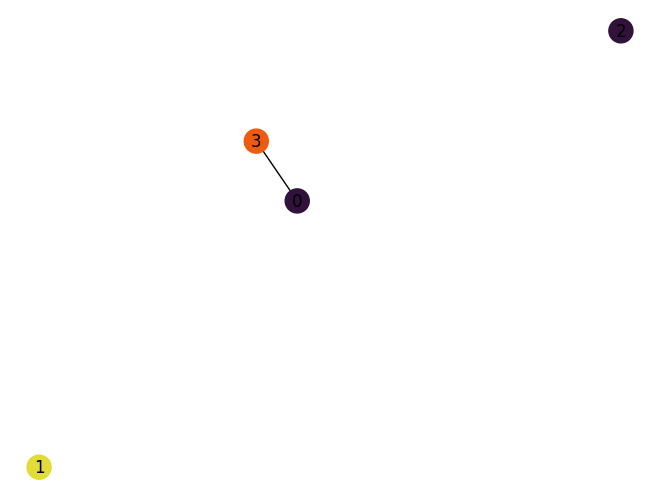

In [24]:
#main code
module = Clicks(graph)
list_color_hex = hexa_color(colors_define)
if verifying_clicks_for_color(list_color_hex, module) == 1:
    print("O grafo nao pode ser colorido com o montante de cores atribuido")
else:
    hash_color = coloring_graph(graph, module.adjacency, list_color_hex)

In [28]:
# Clicks do grafo
print(f'Clicks: {module.clicks}')
#adjacencia do grafo
print(f'Adjacency: {module.adjacency}')
#hash de assimilacao das cores
print(f'Assimilacao das cores: {hash_color}')

Clicks: [[0, 1], [1, 3], [0, 3]]
Adjacency: {0: [3], 1: [], 2: [], 3: [0]}
Assimilacao das cores: {0: '#30123B', 1: '#E1DC37', 2: '#30123B', 3: '#EF5A11'}


### **Explicação de lógica usada**

**Partindo do conceito de estabelecer a coloração de um grafo aleatório por uma regra de formação de COR != do adjacente, foi desenvolvido o pensamento e estabelecida os seguintes ráciocinios.**

**Primeiramente, sabendo do modelo de associação de cliques que pode ser definido como a busca por subgrafos fechados dentro de um esquema, podemos definir que, o maior clique encontrado definine a quantidade de cores necessarias para a coloração do grafo, já que, não haverá nível de complexidade maior que ele em função da quantidade de cores.**

**Sendo assim, passando pela determinação de cliques dentro do grafo criado e descobrindo a quantidade de cores minimas necessarias para a coloração do material, foi definida uma função que distribui as possiveis cores no grafo, de forma a sempre suprir a regra estabelecida.**